In [2]:
pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 12.4 MB/s eta 0:00:00


In [3]:
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_bloch_multivector
from numpy import sqrt, matmul

In [4]:
# Defining some quantum gates

X = Operator([[0,1],[1,0]])
H = Operator([[1/sqrt(2), 1/sqrt(2)],[1/sqrt(2), -1/sqrt(2)]])
I = Operator([[1, 0],[0, 1]])

IH = I ^ H
XI = X ^ I
XI.draw("latex")

IH = I^H

CNOT = Operator(
    [
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0]
                    ]
    )
CNOT.draw("latex")

bell_op = Operator(matmul(CNOT, IH))
bell_op.draw("latex")

HH = H^H
HH.draw("latex")

<IPython.core.display.Latex object>

In [5]:
# Testing the from_label method

ketplus = Statevector.from_label("+")
keti = Statevector.from_label("r")

psi = ketplus.tensor(keti)
psi = psi.evolve(IH)
psi.draw("latex")

<IPython.core.display.Latex object>

In [19]:
# Test with Hadamard in X and Y. After, aplly a CNOT. The control qubit is Y and X is the target

ket00 = Statevector([1, 0, 0, 0])
HH = H ^ H
HH.draw("latex")
ketpsi = ket00.evolve(HH)
test = Operator(matmul(CNOT, HH))

test.draw("latex")

<IPython.core.display.Latex object>

In [20]:
kq = Statevector([-1/sqrt(2), 1/sqrt(2)])
kr = Statevector([-1/sqrt(2), 1/sqrt(2)])
kq.tensor(kr).draw("latex")

<IPython.core.display.Latex object>

In [21]:
ket00 = Statevector([1, 0, 0, 0])
ket00.evolve(I^H).evolve(CNOT).evolve(I^H).draw("latex")

<IPython.core.display.Latex object>

In [22]:
bell_matrix = Operator(matmul(CNOT, IH))
bell_matrix.draw("latex")

<IPython.core.display.Latex object>

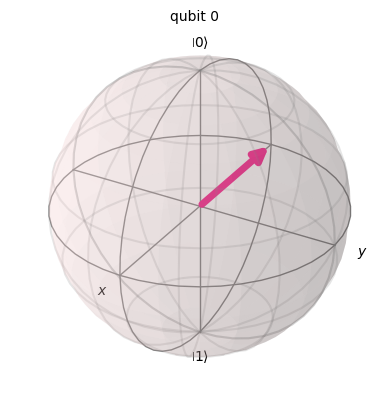

In [23]:
minus_plus = Statevector([1/sqrt(2), -1/sqrt(2)])
plot_bloch_multivector(minus_plus)

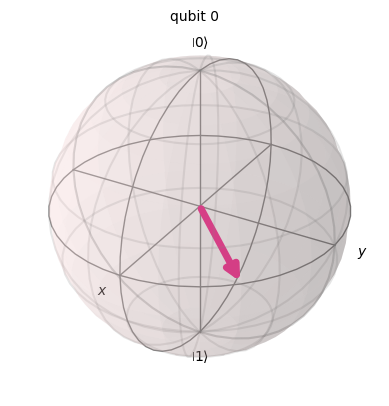

In [11]:
#Using only coordinates to explore the Bloch sphere
import numpy as np

theta = np.pi / 2  # 45 degrees
phi = np.pi / 4    # 60 degrees

# Calculating the components for the state vector
alpha = np.cos(theta / 2)
beta =  np.sin(theta / 2) * np.exp(1j * phi)

# Creating a state vector
state = Statevector([alpha, beta])

# Plot in the Bloch sphere
plot_bloch_multivector(state)

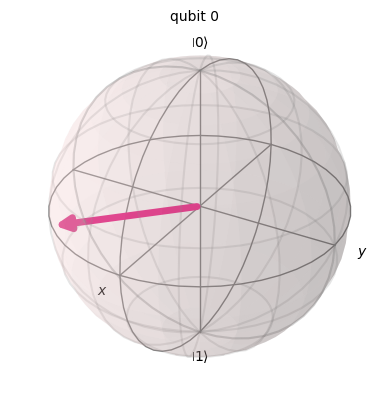

In [12]:
#Using only coordinates to explore the Bloch sphere
theta = np.pi / 2  # 45 degrees
phi = np.pi / 4    # 60 degrees

# Calculating the components for the state vector
alpha = np.cos(theta / 2) * np.exp(1j * phi)
beta =  np.sin(theta / 2)

# Creating a state vector
state = Statevector([alpha, beta])

# Plot in the Bloch sphere
plot_bloch_multivector(state)

In [13]:
# Solving Question 11

CNOTy = Operator([[1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]])
CNOTx = Operator([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
Z = Operator([[1, 0],[0, -1]])

IH = I ^ H
ZI = Z ^ I
HI = H ^ I

circuit = Operator(matmul(HI, matmul(CNOTx, matmul(ZI, matmul(CNOTy,IH)))))

circuit.draw("latex")
CNOTx.draw("latex")

<IPython.core.display.Latex object>

In [26]:
# Solving Question 12
S = Operator([[1, 0],[0, 0 + 1j]])
circuit2 = Operator(matmul(H ^ H, matmul(CNOTx, (S ^ X))))
circuit2.draw("latex")

<IPython.core.display.Latex object>

In [25]:
#Operadores de projeção
I = Operator([[1, 0],[0, 1]])

Pi0 = Operator([[1/3, sqrt(2)/3],[sqrt(2)/3, 1/3]])
Pi1 = Operator([[2/3, -sqrt(2)/3],[-sqrt(2)/3, 2/3]])

#Estado quântico n normalizado
psi = Statevector([1/sqrt(5), -sqrt(2/5), sqrt(2/5), -1/sqrt(5)]/sqrt(6/5))
psi.draw("latex")

result = psi.evolve(I ^ Pi0)
result.draw("latex")

<IPython.core.display.Latex object>